 ####In this project I am going to work on 
 
**Problem :
Prediction of the stock market is one of the most difficult things to do. There are so many factors involved in the prediction- physical
factors vs. physiological, rational, and irrational behavior etc. All these aspects combine to make share prices volatile and difficult 
to predict with a high degree of accuracy. 
Solution :
In this project I am going to build a model to predict the movement of the stock price. To solve this problem, I am going to implement a 
mix of machine learning algorithms to predict the future stock price of the company, starting with linear regression,mean value plot
outoregression model,
and then move on to Auto ARIMA, Prophet.
Dataset :
In this project I will work with historical data about the stock prices of the publicly listed companies.
For this purpose I will be using dataset from Kaggle : "Huge stock market Dataset".
This dataset will be analyzed using python.
Can we use machine learning as a game changer in this domain? Using features like the latest announcements about an organization,
their quarterly revenue results, etc., machine learning techniques have the potential to unearth patterns and insights we didn’t see
before, and these can be used to make unerringly accurate predictions.we will work with historical data about the stock prices of a
publicly listed company. We will implement a mix of machine learning algorithms to predict the future stock price of this company,
starting with simple algorithms
like linear regression, and then move on to advanced techniques like Auto ARIMA and prophet .
Aslo we can compair these differnet models that which model best fits to solve aur problem**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import datetime
from subprocess import check_output
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
filename =print(os.listdir("C:/Users/user/Downloads/price-volume-data-for-all-us-stocks-etfs/Data/"))


['ETFs', 'Stocks']


In [3]:
microsoft = pd.read_csv("C:/Users/user/Downloads/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt")
microsoft.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [4]:
print(microsoft.tail())

            Date   Open    High      Low  Close    Volume  OpenInt
7978  2017-11-06  84.20  84.700  84.0825  84.47  19852151        0
7979  2017-11-07  84.77  84.900  83.9300  84.26  17927878        0
7980  2017-11-08  84.14  84.610  83.8300  84.56  18029584        0
7981  2017-11-09  84.11  84.270  82.9000  84.09  21175384        0
7982  2017-11-10  83.79  84.095  83.2300  83.87  19396301        0


In [5]:
print(microsoft.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


In [6]:
print(microsoft.shape)

(7983, 7)


In [7]:
print(microsoft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7983 entries, 0 to 7982
Data columns (total 7 columns):
Date       7983 non-null object
Open       7983 non-null float64
High       7983 non-null float64
Low        7983 non-null float64
Close      7983 non-null float64
Volume     7983 non-null int64
OpenInt    7983 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 436.6+ KB
None


In [8]:
microsoft.describe()

,Open,High,Low,Close,Volume,OpenInt
count,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7983.0
mean,18.977859,19.187219,18.773635,18.984698,7.945800e+07,0.0
std,16.416068,16.552604,16.277882,16.424012,5.214889e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,2.113300,2.155100,2.079700,2.113300,4.910587e+07,0.0
50%,20.462000,20.697000,20.251000,20.469000,7.059385e+07,0.0
75%,25.475000,25.754000,25.233000,25.483500,9.734927e+07,0.0
max,84.770000,86.200000,84.082500,84.560000,1.371331e+09,0.0


#### 1) Linear Regression

**The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model
returns an equation that determines the relationship between the independent variables and the dependent variable.**


In [9]:

# Prices is the predict value and initial the independet variable (y)
prices = microsoft['Close'].tolist()
initial = (microsoft['Open']).tolist()


#Convert to 1d Vector
prices = np.reshape(prices, (len(prices), 1))
initial = np.reshape(initial, (len(initial), 1))

microsoft.head(5)


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


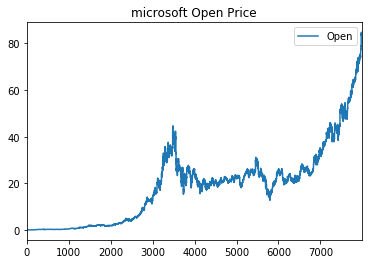

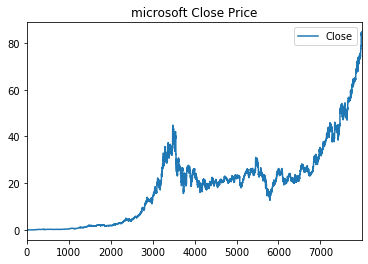

In [10]:
# First, let's check the correlation between the features of the dataset of microsoft.
microsoft[['Open']].plot()
plt.title('microsoft Open Price')
plt.show()

microsoft[['Close']].plot()
plt.title('microsoft Close Price')
plt.show()

In [11]:
# from both the figures above, we clearly state that there is perfect positive correlation bwtween 'open' and 'close'.


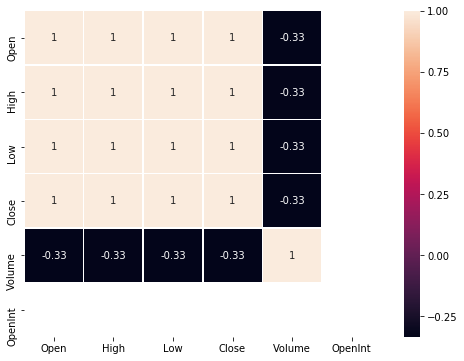

In [12]:
# lets check value of the correlation.
plt.subplots(figsize=(8,6))
sns.heatmap(microsoft.corr(),annot=True, linewidth=.5,)

Text(0, 0.5, 'Density')

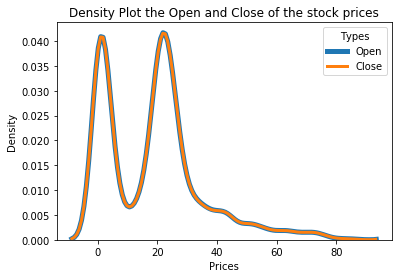

In [13]:
sns.distplot(microsoft['Open'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Open',) 
sns.distplot(microsoft['Close'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='Close') 

plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot the Open and Close of the stock prices')
plt.xlabel('Prices')
plt.ylabel('Density')

Train-set / R2 score: 0.9995674475972668


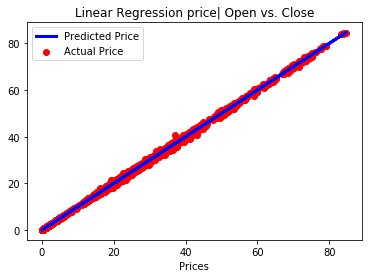

Test-set/ R2 score: 0.9995580968269052


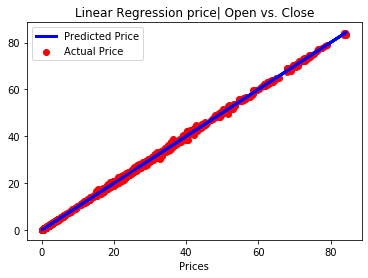

In [14]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
 
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()
 
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

#### 2) Moving Average 
**‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks 
 to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s
 temperature – these all are routine tasks we do on a regular basis.
 So this is a good starting point to use on our dataset for making predictions.
 The predicted closing price for each day will be the average of a set of previously observed values.
 Instead of using the simple average, we will be using the moving average technique which uses the latest set of values
 for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while
 removing the oldest observed value from the set 
 The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and
 validation sets to verify our predictions**

In [15]:

# creating dataframe with date and target variable.
data = microsoft.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(microsoft)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [16]:
#splitting into train and validation
train = new_data[:4000]
valid = new_data[4000:]

In [17]:
new_data.shape, train.shape, valid.shape

((7983, 2), (4000, 2), (3983, 2))

In [18]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()


('1986-03-13', '2002-01-17', '2002-01-18', '2017-11-10')

In [19]:
#make predictions
preds = []
for i in range(0,3983):
    a = train['Close'][len(train)-3983+i:].sum() + sum(preds)
    b = a/3983
    preds.append(b)

In [20]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

21.434580096982078

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


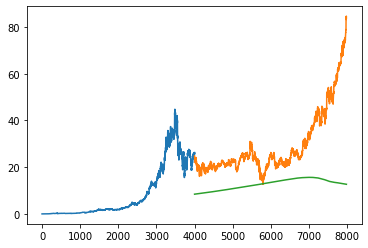

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### Auto ARIMA
**Introduction
ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values
to predict the future values. There are three important parameters in ARIMA:
p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)
Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically 
selects the best combination of (p,q,d) that provides the least error**

In [22]:
# Auto ARIMA 
from pmdarima.arima import auto_arima

data = microsoft.sort_index(ascending=True, axis=0)

train = data[:4000]
valid = data[4000:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=3983)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3830.493, BIC=3861.947, Fit time=121.830 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6381.686, BIC=6394.267, Fit time=4.722 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5393.987, BIC=5419.151, Fit time=24.902 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3810.636, BIC=3835.799, Fit time=104.774 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3809.007, BIC=3840.461, Fit time=124.747 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5394.247, BIC=5419.411, Fit time=20.050 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3811.353, BIC=3849.098, Fit time=252.774 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6381.485, BIC=6400.357, Fit time=5.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=3812.232, BIC=3856.268, Fit time=424.043 seconds
Fit ARIMA: order

In [25]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

33.653093560534444

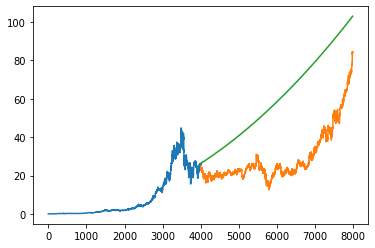

In [26]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

Conclusion : 
**Moving Average model works quite good for this dataset.This model take few seconds to run with minimum computational
requrements.**

**Linear regression is a simple technique and quite easy to interpret.It takes very few time and computational requrements are
less and no need to train the data.**

**An auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model
captured an increasing trend in the series. for this model we need to train the data It takes more time to run the model** 
**as compaired to others (about 10 mins).**
**from figure we can clearly state that this this model is not that much accurate than other models for this dataset.**
